# <p style="text-align: center;"> Pittsburgh: Best Neighborhood to Street Race </p>

<p style="text-align: center;">Presented by Ben Rand-Leach, Richard Wesh, and Stephen Grenesko</p>

## Introduction

   With the amount of activities to do in Pittsburgh dwindling, one has to find ways to keep themselves entertained in the modern day. To find something to alleviate the stresses of college life such as finals, projects, or filling out FASFA for the 1000th time. Sometimes, you just need to unwind, and rather than take a stroll through Schenley Park, or go for a drink at Hemingway's, our group came to the consensus that of course, ***STREET RACING*** is of course the most optimal pass time in the city of Pittsburgh. But what neighborhood to do it in? We will take a look at each neighborhood in Pittsburgh, taking into account different factors such as speed bump count, traffic light density, and crime rates, to determine which neighborhood allows for the ideal street race.

# <p style="text-align: center;"> The Metrics </p>

One of the most inconvenient things to deal with when rushing down the street at 100 mph are speed bumps, and the number in the city has been growing for the last few years. Luckily, the city has provided us with the location of each speed bump currently present in the city limits. By parsing this data from a .csv (comma separated value) file, we can organize the speed bumps by neighborhood, and create a small graph to visualize the data, showing us which neighborhoods posses speed bumps. Sorting this data by size, we can give a nice visual of the nieghborhoods by least speed bump count to most.

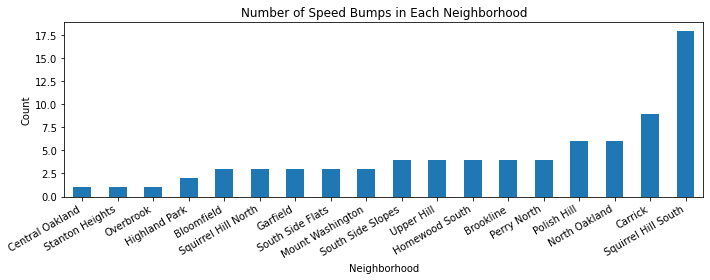

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import data from csv
try:
    bumpData = pd.read_csv("speed_bump_data.csv", index_col="neighborhood")
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

neighborhoodCount = bumpData.groupby('neighborhood').size()

# Sort the neighborhood count data from least to greatest
neighborhoodCount_sorted = neighborhoodCount.sort_values()

# Plot the data on a bar graph
plt.figure(figsize=(10, 4))
neighborhoodCount_sorted.plot(kind='bar')
plt.title('Number of Speed Bumps in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=30, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

## The Verdict
   Based upon the given dataset, looking at the neighborhoods to the right of the graph, (this denotes them having the least amount of speed bumps), that the overall best neighborhoods for drag racing would be Central Oakland, Staton Heights, or Overbrook. Since we have several possible options, and we must choose one, we can look at the street maps to determine the placement of said bumps to see how inconvienient they are. Therefore, based on the little amount of speed bumps, (1), and the out of the way placement, the best neighborhood to drag race based on this given data and metric would be Central Oakland.

## 2.) Traffic Light Count

Another obstacle one would want to avoid when speeding down the streets of Pittsburgh, (other than cobblestone roads, steep inclines, sharp turns, bridges, dead ends, etc), are traffic lights. Other than wanting to avoid the cameras, traffic lights create a hazard for racing, as having to stop, or count on other cars to be stopped, is too dangerous as it might hinder one's ability to win thier race. It also could maybe cause a car crash as well. By parsing another .csv file with the data sorted by individual neighborhood, we can then look at the top 20 neighborhoods with the least amount of traffic lights, and display it on a neat graph to analyze the data.

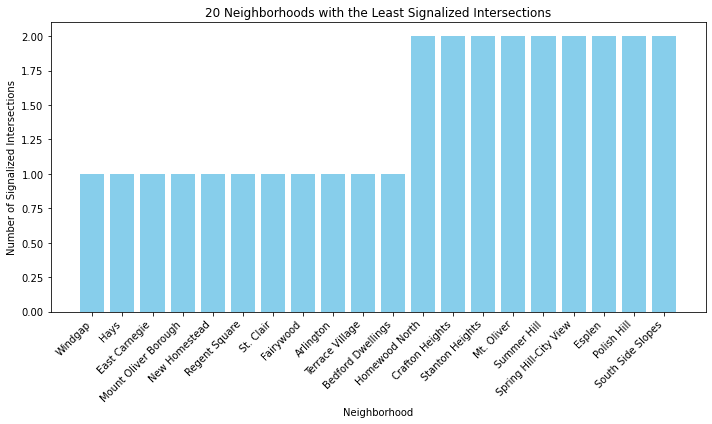

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
signalData = pd.read_csv("intersections.csv")
neighborhoodCount = signalData.groupby('neighborhood').size().reset_index(name='Signalized_Intersections')

# Sort by Signalized_Intersections in ascending order
df_sorted = neighborhoodCount.sort_values(by='Signalized_Intersections', ascending=True)

# Take the top 20 neighborhoods with the least signalized intersections
bottom_5_neighborhoods = df_sorted.head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_neighborhoods['neighborhood'], bottom_5_neighborhoods['Signalized_Intersections'], color='skyblue')
plt.title('20 Neighborhoods with the Least Signalized Intersections')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Signalized Intersections')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## The Verdict

The given set of data shows us that there are a variety of neighborhoods with only one or two traffic lights. However, since there are many neighborhoods that tie for lowest amount of traffic lights, it makes it difficult to choose a single neighborhood to be the best. To draw a more concise conclusion, we would have to compare to the other metrics to determine which neighborhood is the best. However, for conjecture, the top five neighborhoods tied for best are: Windgap, Hays, East Carnegie, Regent Square, and New Homestead, as they all only have one stop light respectively.

## 3.) Crime Rates

Of course, while street racing is our chosen pass time, we will have to do our best to evade the meddeling of law enforcement. To plan accordingly, we can analyze the crime statistics of each neighborhood to observe which parts of the city of Pittsburgh tend to have the highest police presence, as we wouldn't want them to interrupt our racing. We can achieve this by once again parsing through a .csv file, and in conjunction with a .geojson file, (a data file that is used to create maps of a region), and using a color graident, we can mark neighborhoods based on how often police are responding to crimes.

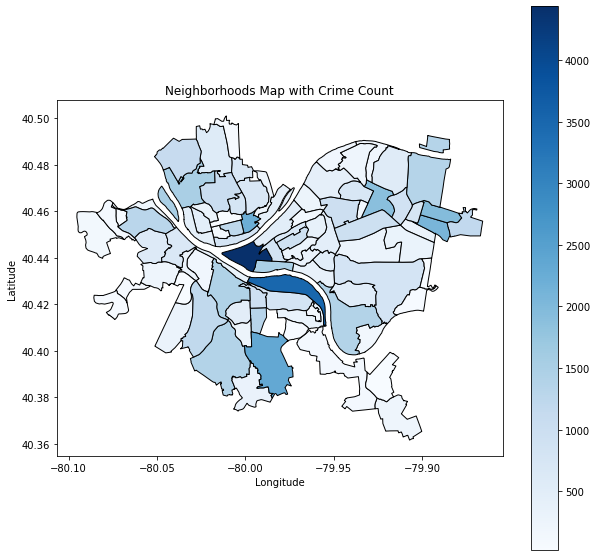

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON file for Pittsburgh neighborhoods
neighborhoods_column = gpd.read_file('Neighborhoods_.geojson')

# Load the CSV file containing incident report data
crime_count = pd.read_csv('crime_rates.csv')

# Count the number of crimes for each neighborhood
neighborhood_crime_count = crime_count.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='crime_count')

# Merge crime count data with neighborhood GeoDataFrame
merged = neighborhoods_column.merge(neighborhood_crime_count, left_on='hood', right_on='INCIDENTNEIGHBORHOOD', how='left')

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='crime_count', cmap='Blues', edgecolor='black', legend=True)
plt.title('Neighborhoods Map with Crime Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Verdict

There were a total of 340,996 reports over the 7 year time span where this data was collected (2016-2023). The map revealed that the two neighborhoods with the most reports were Downtown and South Side, these two areas would be good to avoid in a street race. COnversly, based upon the data from the .csv, we have determined that the best neighborhood, based on being an actual neighborhood in Pittsburgh with the least amount of police activity was Mount Oliver.

# <p style="text-align: center;"> The Conclusion </p>

By parsing all of the data, and passing it into a variety of different data based visuals, we can determine which exact neighborhood is the best to have a street race in. The ideal neighborhood would be one with lowest police presence, speed bump count, and traffic light count. In our research, we found few neighborhoods that had such an overlap, so determining the 'bestness' for our particular metrics would involve some compensation, finding an area that had a nice even and low amount between each sub metric. By looking through our data, the first neighborhood that had a relatively even amount, while also still being very low, came out to be: Stanton Heights. This neighborhood is seen in the top 1/3 of every metric consistently, having only 2 traffic lights, 1 speed bump, and less than 50 instances of reported police incidents in recent history, thus making it the ideal neighborhood for conducting our street racing based upon our chosen parameters.